In [1]:
from sklearn import datasets
import numpy as np
from matplotlib import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/sysak_ma/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
dataset = datasets.load_digits()

In [9]:
X, y = dataset.data, dataset.target
print(X.shape, y.shape)

((1797, 64), (1797,))


In [11]:
from sklearn import model_selection, ensemble, tree

In [12]:
dtc = tree.DecisionTreeClassifier()

In [14]:
score = model_selection.cross_val_score(dtc, X, y, cv=10)
print score

[0.79459459 0.83606557 0.79558011 0.78888889 0.78212291 0.88826816
 0.87709497 0.80898876 0.77966102 0.8125    ]


In [15]:
def write_ans(text, number):
    with open("BaggingRandomForest{}.txt".format(number), "w") as ouf:
        ouf.write(text)

In [16]:
write_ans(str(score.mean()), 1)

In [17]:
bc = ensemble.BaggingClassifier(base_estimator=dtc, n_estimators=100)
score = model_selection.cross_val_score(bc, X, y, cv=10)
print score

[0.88108108 0.95081967 0.91712707 0.93888889 0.91620112 0.98882682
 0.95530726 0.91573034 0.86440678 0.93181818]


In [18]:
write_ans(str(score.mean()), 2)

In [20]:
bcNew = ensemble.BaggingClassifier(base_estimator=dtc, n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
score = model_selection.cross_val_score(bcNew, X, y, cv=10)
print score

[0.9027027  0.96174863 0.93922652 0.92222222 0.93854749 0.93854749
 0.94972067 0.98314607 0.88135593 0.90909091]


In [21]:
write_ans(str(score.mean()), 3)

In [23]:
dtcNew = tree.DecisionTreeClassifier(max_features="sqrt")
bcNewNew = ensemble.BaggingClassifier(base_estimator=dtcNew, n_estimators=100)
score=model_selection.cross_val_score(bcNewNew, X, y, cv=10)
print score

[0.8972973  0.9726776  0.95027624 0.95555556 0.95530726 0.97206704
 0.97765363 0.96629213 0.92655367 0.93181818]


In [24]:
write_ans(str(score.mean()), 4)

In [25]:
print "Bagging: {}".format(score.mean())
print "RandomForest: {}".format(model_selection.cross_val_score(ensemble.RandomForestClassifier(n_estimators=100), X, y, cv=10).mean())

Bagging: 0.95054986135
RandomForest: 0.952792516755


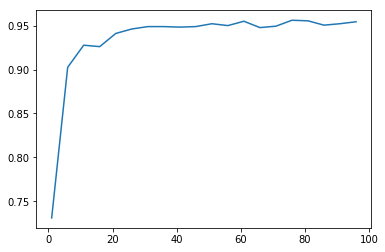

In [26]:
scores=[]
for n in np.arange(1, 100, 5):
    model = ensemble.RandomForestClassifier(n_estimators=n)
    scores.append(model_selection.cross_val_score(model, X, y, cv=10).mean())
    
plt.plot(np.arange(1, 100, 5), scores)
plt.show()

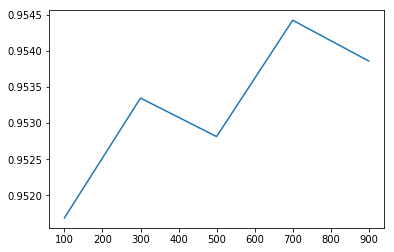

In [27]:
scores=[]
for n in np.arange(100, 1000, 200):
    model = ensemble.RandomForestClassifier(n_estimators=n)
    scores.append(model_selection.cross_val_score(model, X, y, cv=10).mean())

plt.plot(np.arange(100, 1000, 200), scores)
plt.show()

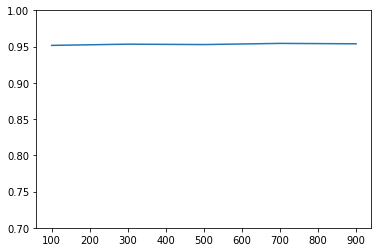

In [28]:
plt.plot(np.arange(100, 1000, 200), scores)
plt.ylim((0.7, 1))
plt.show()

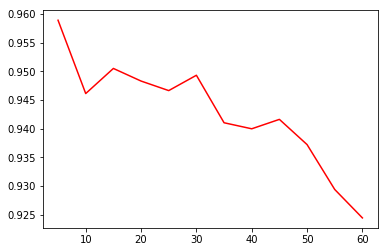

In [29]:
scores = []
for n in np.arange(5, 65, 5):
    model = ensemble.RandomForestClassifier(n_estimators=100, max_features=n)
    scores.append(model_selection.cross_val_score(model, X, y, cv=10).mean())

plt.plot(np.arange(5, 65, 5), scores, color='red')
plt.show()

In [31]:
scores=[]
for n in [5, 8, 12, None]:
    model = ensemble.RandomForestClassifier(n_estimators=100, max_depth=n)
    scores.append(model_selection.cross_val_score(model, X, y, cv=10).mean())

for i in zip([5, 8, 12, None], scores):
    print "{} : {}".format(*i)

5 : 0.908150028041
8 : 0.943793859571
12 : 0.953949724681
None : 0.952755008108


1 - нет
2 - да
3 - да
4 - да
5 - нет
6 - нет
7 - да

In [32]:
write_ans("2 3 4 7", 5)